# 6610450951 Tontawan Janthai

In [1]:
import pandas as pd
import seaborn as sns

# 1

In [14]:
players = pd.read_csv("players.csv").iloc[:, 0:7]
players['shots'] /= players['minutes']
players['passes'] /= players['minutes']
players['tackles'] /= players['minutes']

x = pd.Categorical(players.position, categories=['goalkeeper', 'defender', 'midfielder', 'forward'],
              ordered=True)

players['position'] = x
players = players.sort_values('position')
players

,surname,team,position,minutes,shots,passes,tackles
330,Stekelenburg,Netherlands,goalkeeper,540,0.000000,0.275926,0.000000
204,Kingson,Ghana,goalkeeper,510,0.000000,0.205882,0.001961
260,Marchetti,Italy,goalkeeper,225,0.000000,0.093333,0.000000
54,Schwarzer,Australia,goalkeeper,270,0.000000,0.188889,0.000000
385,Ri Myong-Guk,North Korea,goalkeeper,270,0.000000,0.170370,0.000000
...,...,...,...,...,...,...,...
444,Zigic,Serbia,forward,227,0.022026,0.286344,0.008811
181,Klose,Germany,forward,356,0.030899,0.233146,0.011236
180,Kiessling,Germany,forward,7,0.000000,0.714286,0.000000
200,Gyan,Ghana,forward,501,0.053892,0.301397,0.001996


# 2

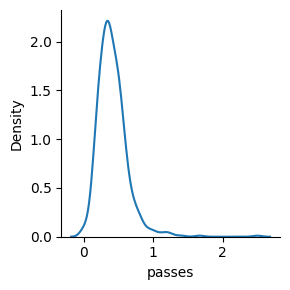

In [25]:
sns.displot(players.passes, kind='kde', height=3)

# 3

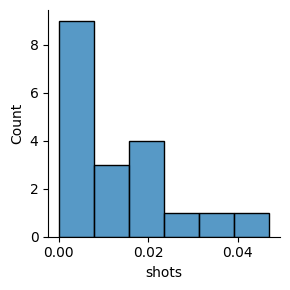

In [24]:
usa_player = players[players['team'] == 'USA']
sns.displot(usa_player.shots, kind='hist',height=3)

# 4

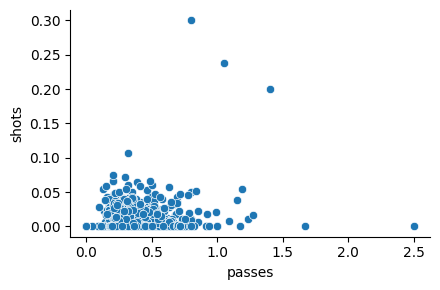

In [27]:
sns.relplot(players, x='passes', y='shots', height=3, aspect=1.5)

# 5

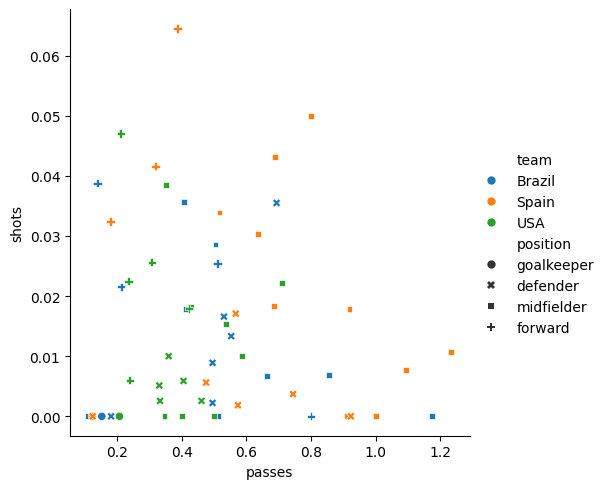

In [52]:
data = players[(players['team'] == 'Brazil') | (players['team'] == 'Spain') | (players['team'] == 'USA')]
data = data.sort_values('team')
sns.relplot(data, x='passes', y='shots', hue='team', style='position')

# 6

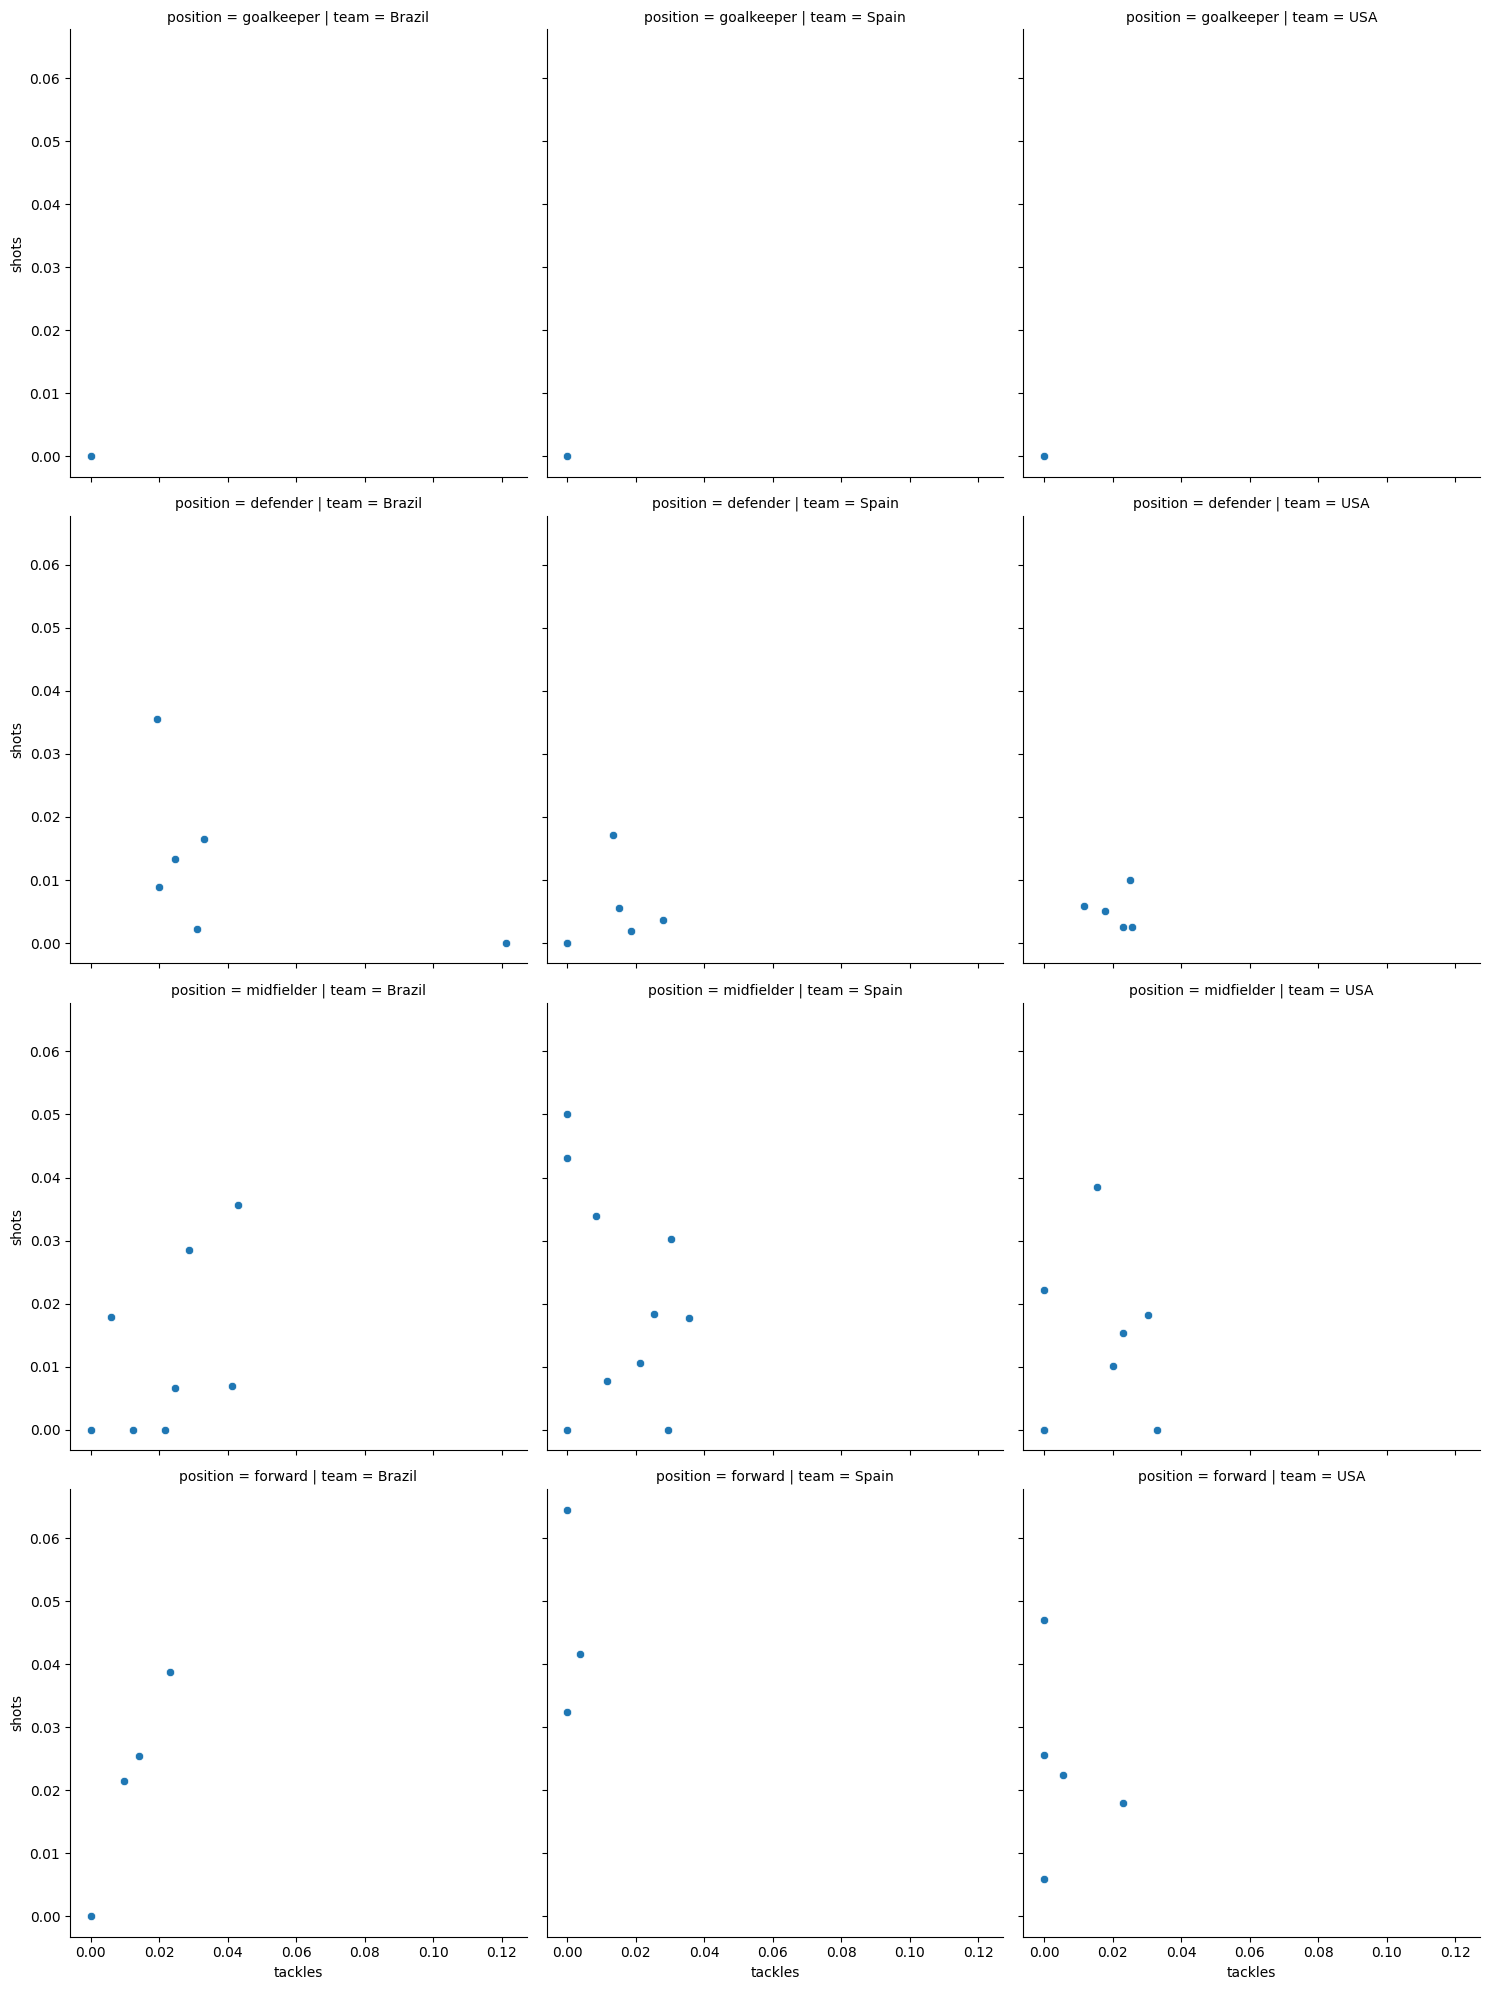

In [53]:
sns.relplot(data, x='tackles', y='shots', row='position', col='team')

# 7

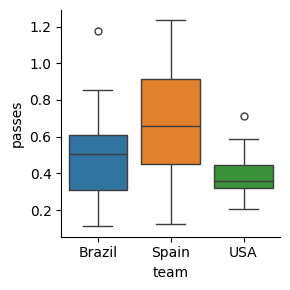

In [55]:
sns.catplot(data, x='team', y='passes', height=3, kind='box', hue='team')

# 8

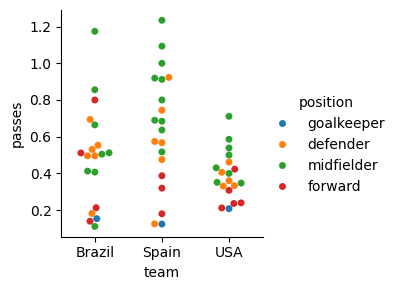

In [56]:
sns.catplot(data, x='team', y='passes', height=3, kind='swarm', hue='position')

# 9

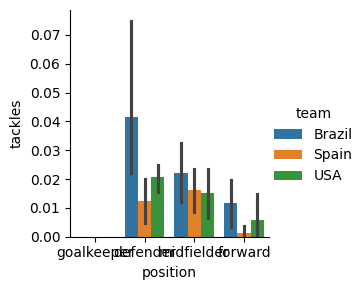

In [57]:
sns.catplot(data, x='position', y='tackles', height=3, kind='bar', hue='team')

# 10

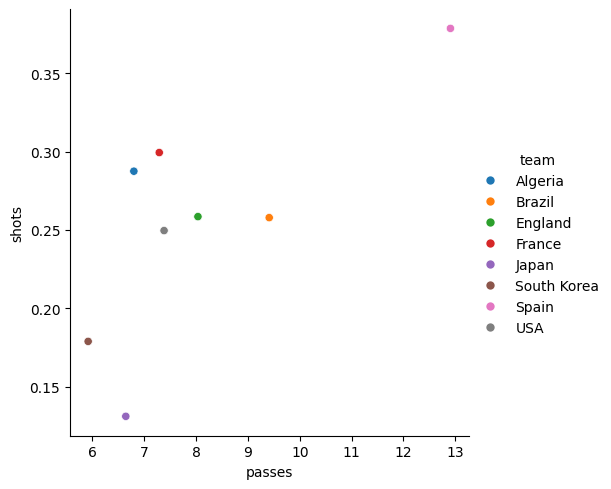

In [64]:
data2 = players[
(players['team'] == 'Brazil') | 
(players['team'] == 'Japan') |
(players['team'] == 'USA') |
(players['team'] == 'Spain') | 
(players['team'] == 'Algeria') | 
(players['team'] == 'France') | 
(players['team'] == 'England') | 
(players['team'] == 'South Korea')
].sort_values('team')

data_aggregated = data2.groupby('team').agg({'passes': 'sum', 'shots': 'sum'})
sns.relplot(data_aggregated, x='passes', y='shots', hue='team', kind='scatter')

# 11

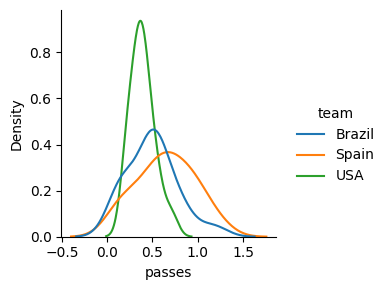

In [61]:
sns.displot(data, x='passes', kind='kde', height=3, hue='team')